In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_csv("spotify_and_muse_data.csv")
data = data.drop_duplicates(subset="id")
data = data.dropna(subset=['sentiments'])

In [3]:
data = data.drop(columns='Unnamed: 0')
data

,id,title,artist,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,sentiments,no_of_tags
0,6NMG1f5QGi1fadM1fJdEaw,Pig,Sparklehorse,0.310,0.912,1,-6.792,1,0.040100,0.021300,0.3090,0.1550,76.266,143067,4,"['angry', 'energetic']",3
1,4WZb6UurjjVs2W6ClgwirI,Hell Broke Luce,Tom Waits,0.617,0.995,0,-5.922,1,0.546000,0.000080,0.2820,0.2980,80.017,236067,4,['angry'],4
2,6SXmPZBeILQOR5zdQbkm47,Dog Faced Boy,Eels,0.659,0.926,4,-5.836,1,0.164000,0.004690,0.0822,0.5120,119.012,197067,4,['angry'],2
3,4KwBfWIgYAFCQQgXTAVZyw,Feel,Stereophonics,0.351,0.800,7,-3.706,0,0.077300,0.000772,0.1510,0.0783,142.068,224933,4,['angry'],3
4,2UXzCNvGSXfjeU5Iynwqhp,The Promise,The Cure,0.340,0.933,5,-3.944,1,0.000625,0.143000,0.4230,0.1670,179.985,616520,3,"['angry', 'intense', 'dark', 'powerful', 'atmo...",23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60995,62TvqP6vN10VA2Z2PXt4Tl,Trees Keep Growing,Azure Ray,0.475,0.104,0,-18.152,1,0.621000,0.590000,0.0999,0.0386,72.923,198107,1,['soft'],9
60996,6f3ROsQr9nwzEjRN7ITIp5,Wounded Head,William Fitzsimmons,0.603,0.317,7,-13.908,1,0.725000,0.006850,0.1940,0.5390,157.670,177970,3,['soft'],1
60997,6437L2kB4GdbDdJbXLOu3G,Friendboats,Mariee Sioux,0.435,0.300,2,-11.222,1,0.903000,0.000711,0.1200,0.1160,96.871,219893,4,['soft'],10
60998,3KF7PrnyI0iswl5BhIIyfU,Oh!,Micky Green,0.893,0.477,10,-7.369,0,0.380000,0.000008,0.1340,0.4810,120.068,227027,4,['soft'],3


In [4]:
trial = pd.read_csv('positive_and_angry_only.csv')

In [5]:
trial = trial.drop(columns = ['Unnamed: 0', 'no_of_tags'])

In [6]:
!pip install sklearn

In [6]:
import csv
from sklearn.utils import Bunch

# edit 
def load_my_fancy_dataset_testing(my_data: pd.DataFrame):
      feature_names = my_data.columns
      feature_names = feature_names[:-1]
      X = []
      for feature in feature_names:
        feature_array = np.array(my_data[feature])
        X.append(feature_array)
      Y = my_data['sentiments']
      Y = Y.map({'angry': 0, 'positive': 1})
      data = np.array(X)
      target = np.array(Y)
      return Bunch(data=data, target=target, feature_names=feature_names)


# eventually want to convert this into a train/test split

In [7]:
trial = trial.drop(columns = ['id', 'title', 'artist', 'key', 'loudness', 'modal', 'instrumentalness', 'liveness', 'duration_ms', 'time_signature'])

In [10]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
dataset = load_my_fancy_dataset_testing(trial)
X = dataset.data
Y = dataset.target
# print(Y)

In [14]:
X

array([[5.08000e-01, 5.87000e-01, 6.65000e-01, ..., 5.26000e-01,
        2.93000e-01, 3.04000e-01],
       [7.62000e-01, 9.65000e-01, 4.85000e-01, ..., 8.40000e-01,
        9.46000e-01, 9.38000e-01],
       [2.54000e-01, 2.04000e-02, 4.90000e-01, ..., 2.92000e-03,
        3.17000e-02, 5.68000e-04],
       [4.44000e-01, 7.71000e-01, 3.06000e-01, ..., 4.33000e-01,
        3.11000e-01, 3.77000e-01],
       [9.99630e+01, 1.32826e+02, 1.19943e+02, ..., 9.39720e+01,
        1.55009e+02, 1.42244e+02]])

In [16]:
X = X.T

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [18]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
Y_predict = knn_model.predict(X_test)

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay

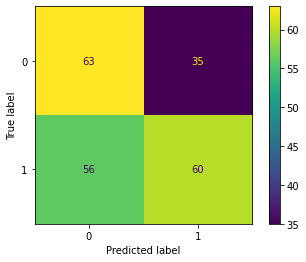

In [20]:
ConfusionMatrixDisplay.from_predictions(y_test, Y_predict)
plt.show()

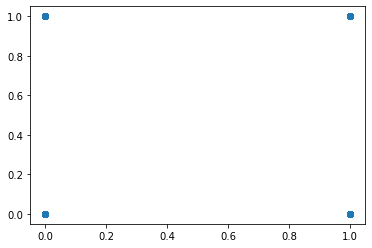

In [21]:
plt.scatter(Y_predict, y_test)
plt.show()

In [56]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [55]:
accuracy_score(Y_np, Y_predict_np)

0.7532710280373832

In [57]:
precision_score(Y_np, Y_predict_np)

0.7748478701825557